In [1]:
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, Input
from keras.models import Model
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [92]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [86]:
print("\nDonnees apprentissage")
print("Nb de points : %d" % y_train.shape[0])
print("Lignes : %d, colonnes : %d" % (x_train.shape[1], x_train.shape[2]))

print("\nDonnees test")
print("Nb de points : %d" % y_test.shape[0])
print("Lignes : %d, colonnes : %d" % (x_test.shape[1], x_test.shape[2]))


Donnees apprentissage
Nb de points : 60000
Lignes : 28, colonnes : 28

Donnees test
Nb de points : 10000
Lignes : 28, colonnes : 28


In [14]:
def classif_rnn_network(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(20)(my_inputs)
    out_probs = Dense(nlabels, activation='softmax')(out_SimpleRNN)
    network = Model( inputs=my_inputs , outputs=out_probs )
    network.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return network


T longueur de la séquence correspond à la largeur de l'image, ici T=28 et D nombre de features correspond à la hauteur de l'image, ici D=28 aussi

In [15]:
import numpy as np
from keras.utils import to_categorical

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

nbclasses = len(np.unique(y_train))
y_train = to_categorical(y_train, nbclasses)
y_test = to_categorical(y_test, nbclasses)

In [16]:
network=classif_rnn_network(28,28,10)

In [90]:
network.fit(x_train, y_train, epochs=10, batch_size = 32, shuffle=True,)

Epoch 1/10
60000/60000 [==============================] - 10s 163us/step - loss: 1.4187 - acc: 0.5113
Epoch 2/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.9408 - acc: 0.6878
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.7946 - acc: 0.7394
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.7179 - acc: 0.7669
Epoch 5/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.7241 - acc: 0.7705
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.7643 - acc: 0.7585
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.7331 - acc: 0.7684
Epoch 8/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.6556 - acc: 0.7981
Epoch 9/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.6253 - acc: 0.8089
Epoch 10/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.61

In [91]:
score_test = network.evaluate(x_test, y_test)
print("\nLoss (test): %.3f" % score_test[0])
print("Taux classif (test): %.3f" % score_test[1])

10000/10000 [==============================] - 1s 95us/step

Loss (test): 0.544
Taux classif (test): 0.841


Ayant normalisé nos données, on obtient environ 84% de bonne classification en test, c'est déjà très satisfaisant.

## Improve the model

In [94]:
from keras.layers import GRU, LSTM
def classif_rnn_network(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = GRU(30)(my_inputs)
    out_probs = Dense(nlabels, activation='softmax')(out_SimpleRNN)
    network = Model( inputs=my_inputs , outputs=out_probs )
    network.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return network

In [95]:
network=classif_rnn_network(28,28,10)
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 30)                5310      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
Total params: 5,620
Trainable params: 5,620
Non-trainable params: 0
_________________________________________________________________


In [96]:
network.fit(x_train, y_train, epochs=10, batch_size = 32, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 26s 435us/step - loss: 2.2725 - acc: 0.1835
Epoch 2/10
60000/60000 [==============================] - 28s 461us/step - loss: 2.0902 - acc: 0.3121
Epoch 3/10
60000/60000 [==============================] - 31s 520us/step - loss: 1.5340 - acc: 0.4668
Epoch 4/10
60000/60000 [==============================] - 30s 502us/step - loss: 1.0245 - acc: 0.6458
Epoch 5/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.7865 - acc: 0.7388
Epoch 6/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.6295 - acc: 0.7890
Epoch 7/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.5119 - acc: 0.83300s - loss: 0.5117 
Epoch 8/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.4167 - acc: 0.8722
Epoch 9/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.3440 - acc: 0.8973
Epoch 10/10
60000/60000 [==============================] - 29s 4

In [97]:
score_test = network.evaluate(x_test, y_test)
print("\nLoss (test): %.3f" % score_test[0])
print("Taux classif (test): %.3f" % score_test[1])

10000/10000 [==============================] - 2s 155us/step

Loss (test): 0.250
Taux classif (test): 0.929


En remplaçant Simple RNN par GRU, on obtient un taux de classification proche de 93%

## Sequence labelling

In [41]:
from keras.layers import TimeDistributed
def rnn_seqlab_network(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(20,return_sequences=True)(my_inputs)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN)
    network = Model( inputs=my_inputs , outputs=out_probs )
    network.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return network

In [42]:
network=rnn_seqlab_network(28,28,10)

In [43]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 28, 20)            980       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 28, 11)            231       
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


In [4]:
from CTCModel import CTCModel

In [495]:
from keras.layers import TimeDistributed
from keras.layers import Dense, SimpleRNN, Input, LSTM, GRU
def rnn_seqlab_network2(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(nlabels,return_sequences=True)(my_inputs)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN)
    network = CTCModel( [my_inputs] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [498]:
model=rnn_seqlab_network2(140,28,10)

In [8]:
import pickle
( x_train , y_train ) , (x_test,y_test) = pickle.load(open("data/seqDigits.pkl" ,"rb"))

In [9]:
import numpy as np
x_train_len=np.asarray([x_train.shape[1] for i in range(x_train.shape[0])])
y_train_len=np.asarray([y_train.shape[1] for i in range(y_train.shape[0])])
x_test_len=np.asarray([x_test.shape[1] for i in range(x_test.shape[0])])
y_test_len=np.asarray([y_test.shape[1] for i in range(y_test.shape[0])])

In [501]:
model.fit(x=[ x_train , y_train , x_train_len , y_train_len ],y=y_train, epochs=10, batch_size = 32, shuffle=True)

Epoch 1/10
10000/10000 [==============================] - 41s 4ms/step - loss: 16.0500
Epoch 2/10
10000/10000 [==============================] - 17s 2ms/step - loss: 13.0528
Epoch 3/10
10000/10000 [==============================] - 17s 2ms/step - loss: 12.4192
Epoch 4/10
10000/10000 [==============================] - 17s 2ms/step - loss: 11.4148
Epoch 5/10
10000/10000 [==============================] - 17s 2ms/step - loss: 10.9495
Epoch 6/10
10000/10000 [==============================] - 16s 2ms/step - loss: 10.6935 0s - loss:
Epoch 7/10
10000/10000 [==============================] - 17s 2ms/step - loss: 10.5067
Epoch 8/10
10000/10000 [==============================] - 17s 2ms/step - loss: 10.4430
Epoch 9/10
10000/10000 [==============================] - 17s 2ms/step - loss: 10.3648
Epoch 10/10
10000/10000 [==============================] - 17s 2ms/step - loss: 10.3415


In [503]:
score=model.evaluate(x=[ x_train , y_train , x_train_len , y_train_len ])
1-np.mean(score[1])

10000/10000 [==============================] - 10s 951us/step


0.20433992147445679

In [504]:
score=model.evaluate(x=[ x_test , y_test , x_test_len , y_test_len ])
1-np.mean(score[1])

2000/2000 [==============================] - 1s 697us/step


0.19029992818832397

On obtient des accuracy autour de 20% en apprentissage et validation, c'est faible.

In [505]:
pred = model.predict([x_test,x_test_len])

In [509]:
for i in range(len(pred)):
    print("real label : {}, predictions : {}, accuracy : {}".format(y_test[i],pred[i],1-score[1][i]))

real label : [ 5.  9.  6.  4.  5.], predictions : [ 3.  7.  3.  4.  7.], accuracy : 0.19999998807907104
real label : [ 9.  2.  1.  7.  9.], predictions : [ 4.  1.  4.  1. -1.], accuracy : 0.19999998807907104
real label : [ 2.  5.  3.  5.  3.], predictions : [ 3.  3.  3.  4.  1.], accuracy : 0.19999998807907104
real label : [ 9.  3.  9.  4.  3.], predictions : [ 4.  1.  4.  3.  3.], accuracy : 0.19999998807907104
real label : [ 5.  2.  5.  7.  9.], predictions : [ 3.  3.  3.  3.  4.], accuracy : 0.0
real label : [ 7.  9.  1.  2.  4.], predictions : [ 4.  7.  3.  1.  7.], accuracy : 0.19999998807907104
real label : [ 7.  4.  2.  7.  1.], predictions : [ 7.  3.  4.  1.  3.], accuracy : 0.19999998807907104
real label : [ 0.  4.  4.  1.  5.], predictions : [ 3.  7.  4.  4.  3.], accuracy : 0.19999998807907104
real label : [ 6.  2.  2.  7.  3.], predictions : [ 3.  3.  3.  1.  3.], accuracy : 0.19999998807907104
real label : [ 7.  5.  8.  1.  0.], predictions : [ 3.  3.  3.  4.  3.], accurac

real label : [ 4.  3.  7.  2.  7.], predictions : [ 4.  3.  7.  3.  7.], accuracy : 0.7999999970197678
real label : [ 5.  8.  5.  0.  7.], predictions : [ 1.  3.  3.  3.  7.], accuracy : 0.19999998807907104
real label : [ 3.  8.  7.  9.  9.], predictions : [ 3.  3.  3.  3.  4.], accuracy : 0.19999998807907104
real label : [ 5.  1.  2.  2.  7.], predictions : [ 3.  7.  3.  3.  1.], accuracy : 0.0
real label : [ 0.  2.  8.  9.  0.], predictions : [ 3.  7.  1.  4.  3.], accuracy : 0.0
real label : [ 0.  8.  4.  3.  2.], predictions : [ 3.  3.  3.  3.  3.], accuracy : 0.19999998807907104
real label : [ 1.  0.  2.  5.  7.], predictions : [ 1.  3.  3.  7.  3.], accuracy : 0.19999998807907104
real label : [ 4.  9.  6.  2.  9.], predictions : [ 1.  7.  4.  3.  1.], accuracy : 0.0
real label : [ 6.  7.  6.  5.  2.], predictions : [ 4.  4.  3.  1.  3.], accuracy : 0.0
real label : [ 9.  9.  9.  1.  2.], predictions : [ 3.  4.  4.  4.  4.], accuracy : 0.0
real label : [ 7.  0.  6.  2.  7.], predi

real label : [ 9.  3.  6.  8.  3.], predictions : [ 1.  3.  3.  3.  3.], accuracy : 0.3999999761581421
real label : [ 0.  0.  9.  0.  0.], predictions : [ 3.  3.  7.  3.  4.], accuracy : 0.0
real label : [ 1.  9.  6.  8.  1.], predictions : [ 7.  4.  3.  4.  4.], accuracy : 0.0
real label : [ 3.  6.  7.  0.  7.], predictions : [ 3.  3.  1.  3.  4.], accuracy : 0.19999998807907104
real label : [ 4.  4.  4.  5.  0.], predictions : [ 7.  7.  4.  3.  3.], accuracy : 0.19999998807907104
real label : [ 7.  7.  6.  0.  6.], predictions : [ 4.  1.  3.  3.  3.], accuracy : 0.0
real label : [ 4.  7.  0.  5.  6.], predictions : [ 4.  7.  7.  3.  3.], accuracy : 0.3999999761581421
real label : [ 5.  3.  4.  9.  6.], predictions : [ 3.  3.  4.  7.  3.], accuracy : 0.3999999761581421
real label : [ 0.  3.  6.  4.  2.], predictions : [ 3.  3.  3.  4.  3.], accuracy : 0.3999999761581421
real label : [ 7.  9.  1.  3.  4.], predictions : [ 4.  4.  7.  3.  4.], accuracy : 0.3999999761581421
real label : 

In [536]:
from keras.layers import TimeDistributed
from keras.layers import Dense, SimpleRNN, Input, LSTM, GRU
def rnn_seqlab_network2(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(nlabels,return_sequences=True,dropout=0.2)(my_inputs)
    out_SimpleRNN2 = SimpleRNN(nlabels,return_sequences=True)(out_SimpleRNN)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN2)
    
    network = CTCModel( [my_inputs] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [537]:
model=rnn_seqlab_network2(140,28,10)

In [538]:
model.fit(x=[ x_train , y_train , x_train_len , y_train_len ],y=y_train, epochs=10, batch_size = 32, shuffle=True)

Epoch 1/10
10000/10000 [==============================] - 39s 4ms/step - loss: 14.5341
Epoch 2/10
10000/10000 [==============================] - 27s 3ms/step - loss: 12.9207
Epoch 3/10
10000/10000 [==============================] - 25s 3ms/step - loss: 11.8737
Epoch 4/10
10000/10000 [==============================] - 25s 3ms/step - loss: 11.0943
Epoch 5/10
10000/10000 [==============================] - 26s 3ms/step - loss: 10.6180
Epoch 6/10
10000/10000 [==============================] - 25s 2ms/step - loss: 10.2246
Epoch 7/10
10000/10000 [==============================] - 26s 3ms/step - loss: 9.7956
Epoch 8/10
10000/10000 [==============================] - 26s 3ms/step - loss: 9.3846
Epoch 9/10
10000/10000 [==============================] - 26s 3ms/step - loss: 8.9422
Epoch 10/10
10000/10000 [==============================] - 27s 3ms/step - loss: 8.7175


In [539]:
score=model.evaluate(x=[ x_train , y_train , x_train_len , y_train_len ])
1-np.mean(score[1])

10000/10000 [==============================] - 13s 1ms/step


0.33441996574401855

In [540]:
score=model.evaluate(x=[ x_test , y_test , x_test_len , y_test_len ])
1-np.mean(score[1])

2000/2000 [==============================] - 2s 1ms/step


0.33700001239776611

On a amélioré notre modèle avec maintenant des accuracy en apprentissage et test autour de 33%

In [541]:
pred = model.predict([x_test,x_test_len])
for i in range(len(pred)):
    print("real label : {}, predictions : {}, accuracy : {}".format(y_test[i],pred[i],1-score[1][i]))

real label : [ 5.  9.  6.  4.  5.], predictions : [ 6.  8.  6.  4.  1.], accuracy : 0.3999999761581421
real label : [ 9.  2.  1.  7.  9.], predictions : [ 4.  2.  3.  1. -1.], accuracy : 0.19999998807907104
real label : [ 2.  5.  3.  5.  3.], predictions : [ 2.  3.  1.  2.  2.], accuracy : 0.19999998807907104
real label : [ 9.  3.  9.  4.  3.], predictions : [ 9.  3.  4.  4.  3.], accuracy : 0.7999999970197678
real label : [ 5.  2.  5.  7.  9.], predictions : [ 1.  2.  3.  1.  4.], accuracy : 0.19999998807907104
real label : [ 7.  9.  1.  2.  4.], predictions : [ 9.  8.  1.  2.  9.], accuracy : 0.3999999761581421
real label : [ 7.  4.  2.  7.  1.], predictions : [ 9.  6.  2.  2.  8.], accuracy : 0.19999998807907104
real label : [ 0.  4.  4.  1.  5.], predictions : [ 6.  9.  4.  4.  3.], accuracy : 0.19999998807907104
real label : [ 6.  2.  2.  7.  3.], predictions : [ 6.  0.  2.  1.  3.], accuracy : 0.5999999940395355
real label : [ 7.  5.  8.  1.  0.], predictions : [ 1.  3.  3.  9.  

real label : [ 4.  9.  7.  1.  9.], predictions : [ 4.  9.  1.  1.  4.], accuracy : 0.5999999940395355
real label : [ 6.  4.  7.  2.  6.], predictions : [ 6.  9.  1.  6.  8.], accuracy : 0.19999998807907104
real label : [ 5.  7.  0.  3.  4.], predictions : [ 1.  1.  6.  3.  9.], accuracy : 0.19999998807907104
real label : [ 6.  9.  6.  2.  9.], predictions : [ 6.  9.  6.  8.  4.], accuracy : 0.5999999940395355
real label : [ 8.  3.  4.  5.  9.], predictions : [ 6.  3.  9.  1. -1.], accuracy : 0.19999998807907104
real label : [ 7.  2.  7.  9.  4.], predictions : [ 4.  6.  1.  1.  8.], accuracy : 0.0
real label : [ 4.  5.  6.  5.  1.], predictions : [ 4.  6.  6.  3.  2.], accuracy : 0.3999999761581421
real label : [ 4.  4.  1.  0.  0.], predictions : [ 9.  9.  9.  2.  0.], accuracy : 0.19999998807907104
real label : [ 2.  5.  3.  4.  8.], predictions : [ 8.  6.  1.  9.  8.], accuracy : 0.19999998807907104
real label : [ 6.  1.  3.  7.  1.], predictions : [ 6.  1.  3.  4.  3.], accuracy :

real label : [ 9.  5.  9.  1.  8.], predictions : [ 9.  6.  4.  9.  1.], accuracy : 0.3999999761581421
real label : [ 0.  8.  0.  7.  9.], predictions : [ 6.  2.  6.  2. -1.], accuracy : 0.0
real label : [ 7.  5.  3.  3.  3.], predictions : [ 9.  3.  3.  2.  3.], accuracy : 0.3999999761581421
real label : [ 2.  6.  8.  1.  5.], predictions : [ 2.  6.  2.  8.  3.], accuracy : 0.3999999761581421
real label : [ 1.  5.  4.  8.  4.], predictions : [ 3.  3.  4.  8.  4.], accuracy : 0.5999999940395355
real label : [ 5.  1.  2.  0.  7.], predictions : [ 3.  2.  2.  6.  8.], accuracy : 0.19999998807907104
real label : [ 7.  3.  3.  5.  5.], predictions : [ 1.  3.  8.  9.  8.], accuracy : 0.19999998807907104
real label : [ 3.  7.  6.  4.  7.], predictions : [ 6.  1.  6.  4. -1.], accuracy : 0.3999999761581421
real label : [ 9.  7.  7.  4.  0.], predictions : [ 4.  9.  4.  4.  8.], accuracy : 0.19999998807907104
real label : [ 1.  6.  1.  0.  8.], predictions : [ 3.  6.  2.  2.  6.], accuracy : 0

In [10]:
from keras.layers import TimeDistributed
from keras.layers import Dense, SimpleRNN, Input, LSTM, GRU
def rnn_seqlab_network2(T,D,nlabels):
    # This returns a tensor
    my_inputs = Input(shape=(T,D))

# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = LSTM(20,return_sequences=True,dropout=0.3)(my_inputs)
    out_GRU = SimpleRNN(20,return_sequences=True)(out_SimpleRNN)
    #out_SimpleRNN3 = SimpleRNN(nlabels,return_sequences=True)(out_SimpleRNN2)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_GRU)
    
    network = CTCModel( [my_inputs] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [11]:
model=rnn_seqlab_network2(140,28,10)

In [12]:
model.fit(x=[ x_train , y_train , x_train_len , y_train_len ],y=y_train, epochs=10, batch_size = 32, shuffle=True)

ValueError: Error when checking target: expected CTCloss to have shape (None, 1) but got array with shape (10000, 5)

In [22]:
score=model.evaluate(x=[ x_train , y_train , x_train_len , y_train_len ])
1-np.mean(score[1])

10000/10000 [==============================] - 12s 1ms/step


0.0

## Séquences de longueurs différentes

Pour les séquences entre 2 à 4 chiffres, on complète les images séquences pour avoir une image toutes de même taille que les images à 4 chiffresavec éventuellement 1 ou 2 chiffres manquants. Pour celà, on "padde" avec un nombre qui n'est pas entre 0 et 255, disons 256 pour les x puis on met un mask dans le modèle avec valeur 256. Pour les labels, j'ai choisi de padder avec 10 qui représente donc un blanc.

c:\users\moosb\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="one")`
  
c:\users\moosb\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1, activation="tanh", recurrent_initializer="one", kernel_initializer="one", recurrent_activation="tanh")`
  if __name__ == '__main__':


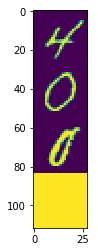

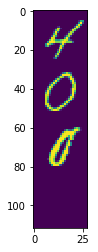

In [65]:
import keras
#from keras.utils.visualize_util import plot
from keras.layers import *
from keras.models import Model
from matplotlib import pyplot as plt
net_input = Input(shape = ( 112, 28))
mask = Masking(mask_value = 256)(net_input)
model = Model(net_input, mask)

#print('W: ' + str(model.get_weights()))

net_in = x_pad
out = model.predict(net_in)
plt.imshow(net_in[2])
plt.show()
plt.imshow(out[2])
plt.show()

In [23]:
from keras.layers import Masking
from keras.layers import GRU
from keras.preprocessing.sequence import pad_sequences
def rnn_seqlab_network3(D,nlabels):
    # This returns a tensor
    my_inputs_padded = Input(shape=(None,D))
    my_inputs=Masking(mask_value=256)(my_inputs_padded)
# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(nlabels+1,return_sequences=True)(my_inputs)
    #out_SimpleRNN2 = SimpleRNN(nlabels,return_sequences=True)(out_SimpleRNN)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN)
    network = CTCModel( [my_inputs_padded] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [24]:
model=rnn_seqlab_network3(28,10)

In [25]:
import pickle
( x_train , y_train ),(x_test,y_test) = pickle.load(open("data/seqDigitsVar.pkl" ,"rb"))

In [26]:
x_pad = pad_sequences(x_train, value=float(256), dtype='float32', padding="post", truncating='post')
y_pad = pad_sequences(y_train, value=float(10), dtype='float32', padding="post")
x_pad_len=np.asarray([x_pad.shape[1] for i in range(x_pad.shape[0])])
y_pad_len=np.asarray([y_pad.shape[1] for i in range(y_pad.shape[0])])

In [27]:
model.fit(x=[ x_pad , y_pad , x_pad_len , y_pad_len ],y=y_pad, epochs=10, batch_size = 32,shuffle=True)

Epoch 1/10
10000/10000 [==============================] - 16s 2ms/step - loss: 9.7855: 0s - loss: 9.787
Epoch 2/10
10000/10000 [==============================] - 14s 1ms/step - loss: 8.1006
Epoch 3/10
10000/10000 [==============================] - 14s 1ms/step - loss: 7.9280
Epoch 4/10
10000/10000 [==============================] - 14s 1ms/step - loss: 7.8139
Epoch 5/10
10000/10000 [==============================] - 15s 1ms/step - loss: 7.7126
Epoch 6/10
10000/10000 [==============================] - 16s 2ms/step - loss: 7.6227
Epoch 7/10
10000/10000 [==============================] - 16s 2ms/step - loss: 7.5449
Epoch 8/10
10000/10000 [==============================] - 14s 1ms/step - loss: 7.4824
Epoch 9/10
10000/10000 [==============================] - 14s 1ms/step - loss: 7.4325
Epoch 10/10
10000/10000 [==============================] - 15s 1ms/step - loss: 7.3889


In [28]:
score=model.evaluate(x=[ x_pad , y_pad , x_pad_len , y_pad_len ])
1-np.mean(score[1])

10000/10000 [==============================] - 8s 809us/step


0.00012499094009399414

In [29]:
x_test_pad=pad_sequences(x_test, value=float(256), dtype='float32', padding="post", truncating='post')
x_test_pad_len=np.asarray([x_test_pad.shape[1] for i in range(x_test_pad.shape[0])])
y_test_pad=pad_sequences(y_test, value=float(10), dtype='float32', padding="post")
y_test_pad_len=np.asarray([y_test_pad.shape[1] for i in range(y_test_pad.shape[0])])

In [31]:
score=model.evaluate(x=[ x_test_pad , y_test_pad , x_test_pad_len , y_test_pad_len ])
1-np.mean(score[1])

2000/2000 [==============================] - 1s 742us/step


0.00012499094009399414

On est à moins de 1% d'accuracy en apprentissage et validation, le modèle n'est pas adapté

In [32]:
predictions = model.predict([x_test_pad,x_test_pad_len])

In [33]:
for i in range(len(predictions)):
    print("real label : {}, predictions : {}".format(y_test[i],predictions[i]))

real label : [ 3.  3.  1.  4.], predictions : []
real label : [ 1.  1.], predictions : []
real label : [ 0.  7.  2.], predictions : []
real label : [ 6.  4.], predictions : []
real label : [ 5.  8.], predictions : []
real label : [ 0.  6.  9.], predictions : []
real label : [ 6.  8.  6.  6.], predictions : []
real label : [ 4.  1.], predictions : []
real label : [ 8.  4.], predictions : []
real label : [ 2.  3.  3.  1.], predictions : []
real label : [ 8.  8.], predictions : []
real label : [ 3.  7.], predictions : []
real label : [ 7.  5.], predictions : []
real label : [ 5.  7.  9.], predictions : []
real label : [ 1.  6.  9.  1.], predictions : []
real label : [ 0.  3.  3.  9.], predictions : []
real label : [ 3.  6.  1.], predictions : []
real label : [ 1.  9.  9.], predictions : []
real label : [ 3.  0.  0.], predictions : []
real label : [ 8.  7.  4.  8.], predictions : []
real label : [ 9.  3.  7.  5.], predictions : []
real label : [ 6.  6.], predictions : []
real label : [ 2. 

real label : [ 3.  0.  9.], predictions : []
real label : [ 7.  4.], predictions : []
real label : [ 9.  4.  1.  7.], predictions : []
real label : [ 7.  4.  0.], predictions : []
real label : [ 7.  9.  1.  4.], predictions : []
real label : [ 8.  1.], predictions : []
real label : [ 3.  9.  3.], predictions : []
real label : [ 7.  5.  7.  0.], predictions : []
real label : [ 6.  8.], predictions : []
real label : [ 5.  1.  6.  4.], predictions : []
real label : [ 6.  9.  9.  9.], predictions : []
real label : [ 7.  9.], predictions : []
real label : [ 2.  4.  6.  9.], predictions : []
real label : [ 9.  0.  8.], predictions : []
real label : [ 0.  0.  2.  7.], predictions : []
real label : [ 0.  8.  4.  4.], predictions : []
real label : [ 5.  5.], predictions : []
real label : [ 6.  2.  1.  4.], predictions : []
real label : [ 2.  6.  1.], predictions : []
real label : [ 9.  1.  1.  6.], predictions : []
real label : [ 7.  8.], predictions : []
real label : [ 3.  1.], predictions : [

In [2]:
from keras.layers import Masking
from keras.layers import GRU
from keras.preprocessing.sequence import pad_sequences
def rnn_seqlab_network(D,nlabels):
    # This returns a tensor
    my_inputs_padded = Input(shape=(None,D))
    my_inputs=Masking(mask_value=256)(my_inputs_padded)
# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = SimpleRNN(20,return_sequences=True)(my_inputs)
    out_SimpleRNN2 = SimpleRNN(20,return_sequences=True)(out_SimpleRNN)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN2)
    network = CTCModel( [my_inputs_padded] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [3]:
model=rnn_seqlab_network(28,10)

NameError: name 'CTCModel' is not defined

In [48]:
model.fit(x=[ x_pad , y_pad , x_pad_len , y_pad_len ],y=y_pad, epochs=10, batch_size = 32,shuffle=True)

Epoch 1/10
10000/10000 [==============================] - 30s 3ms/step - loss: 9.6331
Epoch 2/10
10000/10000 [==============================] - 27s 3ms/step - loss: 8.1171
Epoch 3/10
10000/10000 [==============================] - 25s 3ms/step - loss: 7.7928
Epoch 4/10
10000/10000 [==============================] - 25s 3ms/step - loss: 7.5637
Epoch 5/10
10000/10000 [==============================] - 25s 2ms/step - loss: 7.3561
Epoch 6/10
10000/10000 [==============================] - 25s 3ms/step - loss: 7.1559
Epoch 7/10
10000/10000 [==============================] - 28s 3ms/step - loss: 6.9416
Epoch 8/10
10000/10000 [==============================] - 25s 3ms/step - loss: 6.6700
Epoch 9/10
10000/10000 [==============================] - 27s 3ms/step - loss: 6.3971
Epoch 10/10
10000/10000 [==============================] - 25s 3ms/step - loss: 6.1543


In [52]:
predictions = model.predict([x_test_pad,x_test_pad_len])

In [50]:
score=model.evaluate(x=[ x_pad , y_pad , x_pad_len , y_pad_len ])
1-np.mean(score[1])

10000/10000 [==============================] - 14s 1ms/step


0.052749991416931152

In [51]:
score=model.evaluate(x=[ x_test_pad , y_test_pad , x_test_pad_len , y_test_pad_len ])
1-np.mean(score[1])

2000/2000 [==============================] - 3s 1ms/step


0.053499996662139893

On obtient une accuracy autour de 5% en apprentissage et validation, c'est faible.

In [53]:
for i in range(len(predictions)):
    print("real label : {}, predictions : {}".format(y_test[i],predictions[i]))

real label : [ 3.  3.  1.  4.], predictions : [-1. -1.]
real label : [ 1.  1.], predictions : [-1. -1.]
real label : [ 0.  7.  2.], predictions : [-1. -1.]
real label : [ 6.  4.], predictions : [-1. -1.]
real label : [ 5.  8.], predictions : [-1. -1.]
real label : [ 0.  6.  9.], predictions : [ 0. -1.]
real label : [ 6.  8.  6.  6.], predictions : [-1. -1.]
real label : [ 4.  1.], predictions : [-1. -1.]
real label : [ 8.  4.], predictions : [-1. -1.]
real label : [ 2.  3.  3.  1.], predictions : [ 3. -1.]
real label : [ 8.  8.], predictions : [-1. -1.]
real label : [ 3.  7.], predictions : [-1. -1.]
real label : [ 7.  5.], predictions : [-1. -1.]
real label : [ 5.  7.  9.], predictions : [-1. -1.]
real label : [ 1.  6.  9.  1.], predictions : [-1. -1.]
real label : [ 0.  3.  3.  9.], predictions : [-1. -1.]
real label : [ 3.  6.  1.], predictions : [-1. -1.]
real label : [ 1.  9.  9.], predictions : [-1. -1.]
real label : [ 3.  0.  0.], predictions : [ 3.  0.]
real label : [ 8.  7.  4

real label : [ 1.  7.], predictions : [-1. -1.]
real label : [ 4.  9.], predictions : [-1. -1.]
real label : [ 0.  4.  2.  3.], predictions : [ 0.  3.]
real label : [ 4.  1.], predictions : [-1. -1.]
real label : [ 8.  6.], predictions : [-1. -1.]
real label : [ 0.  1.  7.  4.], predictions : [-1. -1.]
real label : [ 3.  8.  7.], predictions : [-1. -1.]
real label : [ 3.  9.  1.  1.], predictions : [-1. -1.]
real label : [ 0.  9.], predictions : [ 0. -1.]
real label : [ 6.  7.  8.], predictions : [-1. -1.]
real label : [ 5.  3.  6.], predictions : [-1. -1.]
real label : [ 1.  1.  7.  8.], predictions : [-1. -1.]
real label : [ 1.  3.], predictions : [ 3. -1.]
real label : [ 3.  9.], predictions : [ 3. -1.]
real label : [ 2.  6.  0.  3.], predictions : [ 0. -1.]
real label : [ 0.  3.  1.  8.], predictions : [ 3. -1.]
real label : [ 2.  7.  3.], predictions : [-1. -1.]
real label : [ 3.  7.  2.  1.], predictions : [-1. -1.]
real label : [ 7.  5.  2.  0.], predictions : [-1. -1.]
real lab

real label : [ 0.  2.], predictions : [-1. -1.]
real label : [ 3.  3.  0.], predictions : [-1. -1.]
real label : [ 7.  3.], predictions : [-1. -1.]
real label : [ 3.  7.  3.  9.], predictions : [ 3. -1.]
real label : [ 7.  6.  2.  1.], predictions : [-1.]
real label : [ 1.  2.], predictions : [-1.]
real label : [ 8.  6.], predictions : [-1.]
real label : [ 0.  6.  3.  7.], predictions : [-1.]
real label : [ 0.  5.], predictions : [ 0.]
real label : [ 8.  0.  2.], predictions : [ 0.]
real label : [ 5.  4.  6.  6.], predictions : [-1.]
real label : [ 0.  8.], predictions : [ 0.]
real label : [ 4.  8.], predictions : [-1.]
real label : [ 9.  7.], predictions : [-1.]
real label : [ 9.  5.  2.  1.], predictions : [-1.]
real label : [ 3.  8.  2.], predictions : [ 3.]
real label : [ 5.  5.  1.], predictions : [-1.]
real label : [ 1.  9.  4.], predictions : [-1.]
real label : [ 6.  2.], predictions : [-1.]
real label : [ 8.  4.], predictions : [-1.]
real label : [ 0.  6.], predictions : [ 0.]


In [34]:
from keras.layers.wrappers import Bidirectional
from keras.layers import Masking
from keras.layers import GRU
def rnn_seqlab_network5(D,nlabels):
    # This returns a tensor
    my_inputs_padded = Input(shape=(None,D))
    my_inputs=Masking(mask_value=256)(my_inputs_padded)
# a layer instance is callable on a tensor, and returns a tensor
    out_SimpleRNN = Bidirectional(SimpleRNN(20,return_sequences=True))(my_inputs)
    out_SimpleRNN2 = Bidirectional(SimpleRNN(20,return_sequences=True))(out_SimpleRNN)
    #out_GRU = Bidirectional(GRU(nlabels,return_sequences=True))(my_inputs)
    #out_SimpleRNN2 = SimpleRNN(nlabels,return_sequences=True)(out_SimpleRNN)
    out_probs = TimeDistributed(Dense(nlabels+1, activation='softmax'))(out_SimpleRNN2)
    network = CTCModel( [my_inputs_padded] , [out_probs] )
    network.compile(optimizer='sgd')
    return network

In [35]:
model=rnn_seqlab_network5(28,10)

In [36]:
import pickle
( x_train , y_train ),(x_test,y_test) = pickle.load(open("data/seqDigitsVar.pkl" ,"rb"))

In [37]:
from keras.preprocessing.sequence import pad_sequences
x_pad = pad_sequences(x_train, value=float(256), dtype='float32', padding="post", truncating='post')
y_pad = pad_sequences(y_train, value=float(11),dtype='float32', padding="post")

In [38]:
import numpy as np
x_pad_len=np.asarray([x_pad.shape[1] for i in range(x_pad.shape[0])])
y_pad_len=np.asarray([y_pad.shape[1] for i in range(y_pad.shape[0])])

In [39]:
model.fit(x=[ x_pad , y_pad , x_pad_len , y_pad_len ],y=y_pad, epochs=10, batch_size = 32, shuffle=True)

ValueError: Error when checking target: expected CTCloss to have shape (None, 1) but got array with shape (10000, 4)

In [43]:
x_test_pad=pad_sequences(x_test, value=float(256), dtype='float32', padding="post", truncating='post')
x_test_pad_len=np.asarray([x_test.shape[1] for i in range(x_test.shape[0])])
predictions = model.predict([x_test_pad,x_test_pad_len])

In [45]:
for i in range(len(predictions)):
    print("real label : {}, predictions : {}".format(y_test[i],predictions[i]))

real label : [ 3.  3.  1.  4.], predictions : [ 3.  1.  9. -1.]
real label : [ 1.  1.], predictions : [ 1. -1. -1. -1.]
real label : [ 0.  7.  2.], predictions : [ 7. -1. -1. -1.]
real label : [ 6.  4.], predictions : [ 6.  9. -1. -1.]
real label : [ 5.  8.], predictions : [-1. -1. -1. -1.]
real label : [ 0.  6.  9.], predictions : [ 0.  6.  4. -1.]
real label : [ 6.  8.  6.  6.], predictions : [ 8. -1. -1. -1.]
real label : [ 4.  1.], predictions : [ 9. -1. -1. -1.]
real label : [ 8.  4.], predictions : [ 8.  4. -1. -1.]
real label : [ 2.  3.  3.  1.], predictions : [ 2.  7.  3. -1.]
real label : [ 8.  8.], predictions : [ 8.  8. -1. -1.]
real label : [ 3.  7.], predictions : [ 2.  7. -1. -1.]
real label : [ 7.  5.], predictions : [ 7.  5. -1. -1.]
real label : [ 5.  7.  9.], predictions : [ 5.  7. -1. -1.]
real label : [ 1.  6.  9.  1.], predictions : [ 1.  6.  9.  1.]
real label : [ 0.  3.  3.  9.], predictions : [ 0.  3.  5.  9.]
real label : [ 3.  6.  1.], predictions : [ 3.  6.  

real label : [ 1.  7.], predictions : [ 1.  7. -1. -1.]
real label : [ 6.  3.  0.  0.], predictions : [ 3. -1. -1. -1.]
real label : [ 9.  1.  1.], predictions : [ 9.  1.  1. -1.]
real label : [ 6.  8.  1.  6.], predictions : [ 6.  8.  1. -1.]
real label : [ 9.  9.  2.  6.], predictions : [ 4.  2.  6. -1.]
real label : [ 4.  4.  3.  9.], predictions : [ 9.  3.  9. -1.]
real label : [ 3.  7.  8.], predictions : [ 2.  7. -1. -1.]
real label : [ 1.  7.], predictions : [ 1.  3. -1. -1.]
real label : [ 4.  9.], predictions : [ 9.  9. -1. -1.]
real label : [ 0.  4.  2.  3.], predictions : [ 4.  7.  2.  3.]
real label : [ 4.  1.], predictions : [ 1.  4.  1.  3.]
real label : [ 8.  6.], predictions : [-1. -1. -1. -1.]
real label : [ 0.  1.  7.  4.], predictions : [ 7.  4. -1. -1.]
real label : [ 3.  8.  7.], predictions : [ 3.  6.  7. -1.]
real label : [ 3.  9.  1.  1.], predictions : [ 9.  1. -1. -1.]
real label : [ 0.  9.], predictions : [ 0.  9. -1. -1.]
real label : [ 6.  7.  8.], predicti

real label : [ 8.  9.  8.], predictions : [ 9.  8. -1. -1.]
real label : [ 0.  2.  0.], predictions : [ 0.  0. -1. -1.]
real label : [ 9.  3.  4.  9.], predictions : [ 5.  9.  9. -1.]
real label : [ 5.  7.], predictions : [ 7. -1. -1. -1.]
real label : [ 8.  0.  9.], predictions : [ 8.  0.  9. -1.]
real label : [ 9.  7.  8.], predictions : [ 9.  7.  8. -1.]
real label : [ 0.  6.], predictions : [ 0.  6. -1. -1.]
real label : [ 3.  9.  7.], predictions : [ 3.  9.  7. -1.]
real label : [ 9.  9.  2.], predictions : [ 9.  9. -1. -1.]
real label : [ 4.  6.  7.  8.], predictions : [ 8.  6.  7.  8.]
real label : [ 7.  0.  3.  5.], predictions : [ 7.  0.  5.  5.]
real label : [ 7.  6.  6.  3.], predictions : [ 7.  3. -1. -1.]
real label : [ 8.  2.  8.  7.], predictions : [ 8.  7.  7. -1. -1. -1.]
real label : [ 7.  1.  6.], predictions : [ 7.  1. -1. -1. -1. -1.]
real label : [ 2.  6.], predictions : [ 7.  6. -1. -1. -1. -1.]
real label : [ 7.  0.  8.  8.], predictions : [ 7.  6.  8. -1. -1. -

La différence est nette avec et sans bidirectional, on a de biens meilleures prédictions avec bidirectional

In [21]:
import keras
keras._version


AttributeError: module 'keras' has no attribute '_version'